In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

In [2]:
# Load the data
mitigation_data = pd.read_csv("mitigation_strategies_covid.csv")
covid_data = pd.read_csv("owid_covid_data_revised.csv")

In [3]:
# ------
# EDA for mitigation_data

# Set float formatting
pd.set_option('display.float_format', '{:.2f}'.format)

# Statistical Summary for mitigation_data
print("\033[1m" + "Statistical Summary for mitigation_data:" + "\033[0m")
print()
print(mitigation_data.describe())

Statistical Summary for mitigation_data:

       stringency_index  restrictions_internal_movements  \
count          35145.00                         35145.00   
mean              55.30                             1.01   
std               29.47                             0.93   
min                0.00                             0.00   
25%               32.41                             0.00   
50%               61.11                             1.00   
75%               79.63                             2.00   
max              100.00                             2.00   

       international_travel_controls  restriction_gatherings  school_closures  \
count                       35145.00                35145.00         35145.00   
mean                            2.85                    2.33             1.99   
std                             1.36                    1.65             1.24   
min                             0.00                    0.00             0.00   
25%         

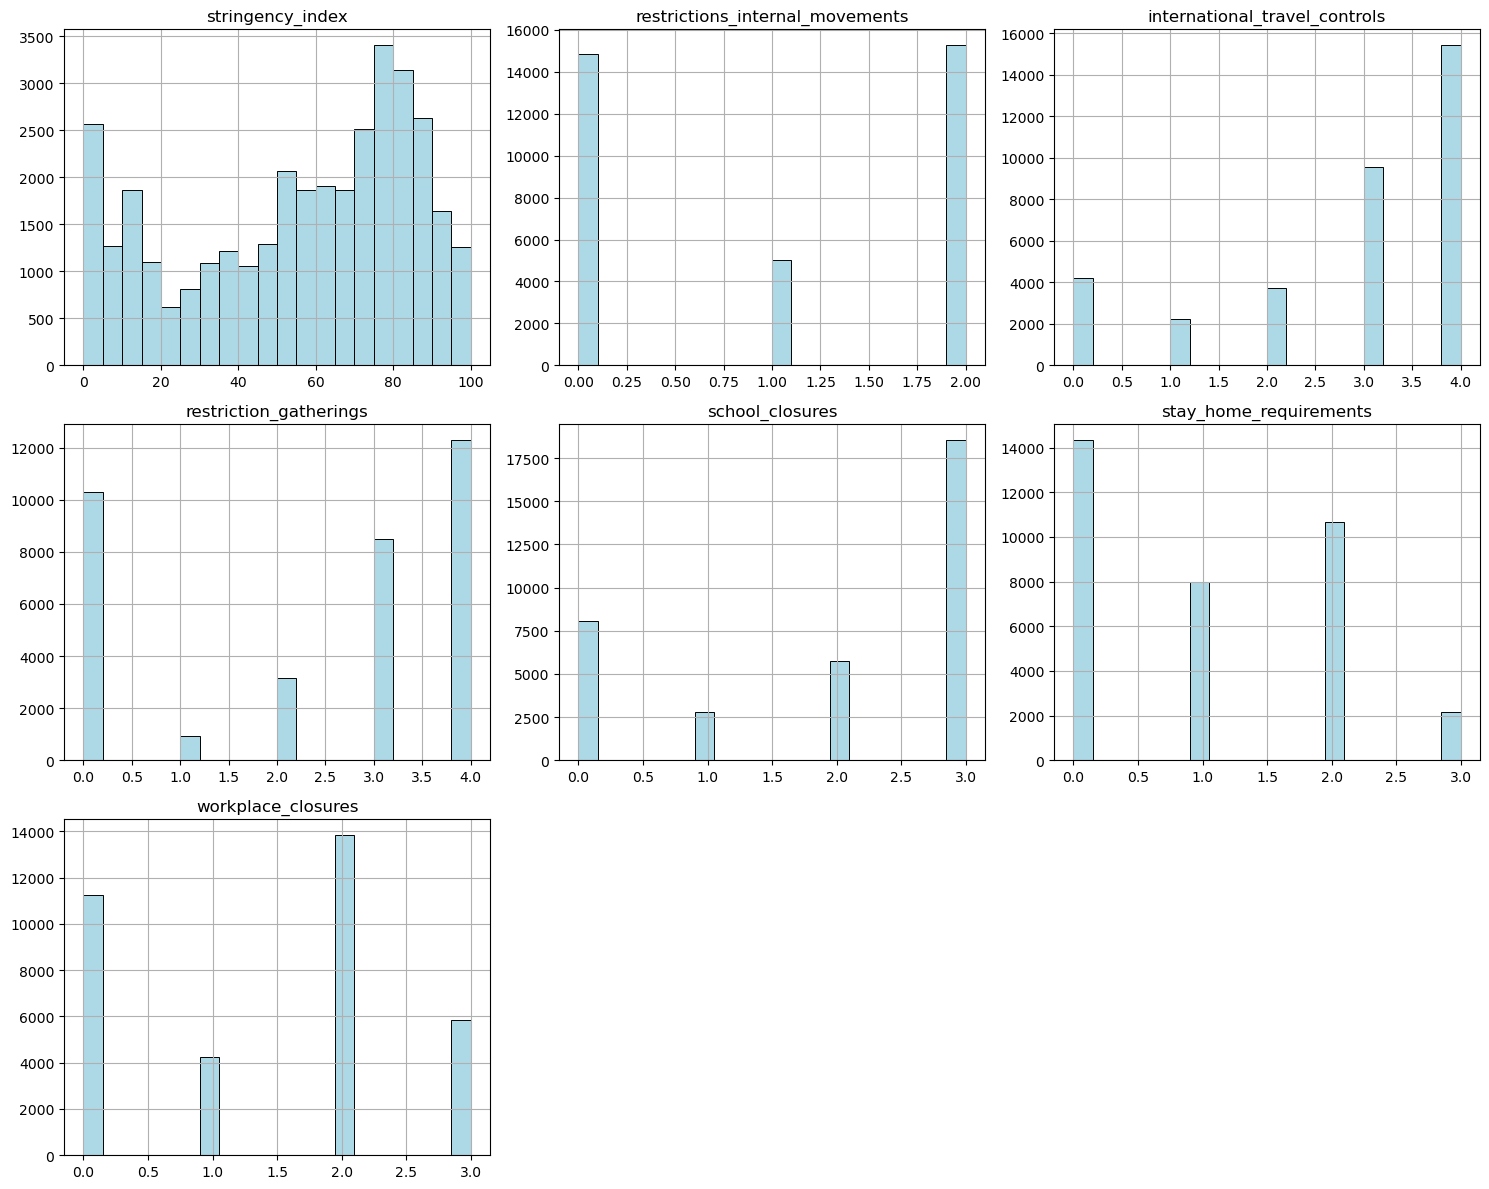

In [4]:
# Plot histograms for numerical columns in mitigation_data
mitigation_data.hist(figsize=(15, 12), 
                     bins=20, 
                     linewidth=0.7, 
                     color='lightblue', 
                     edgecolor='black')
plt.tight_layout()
plt.show()

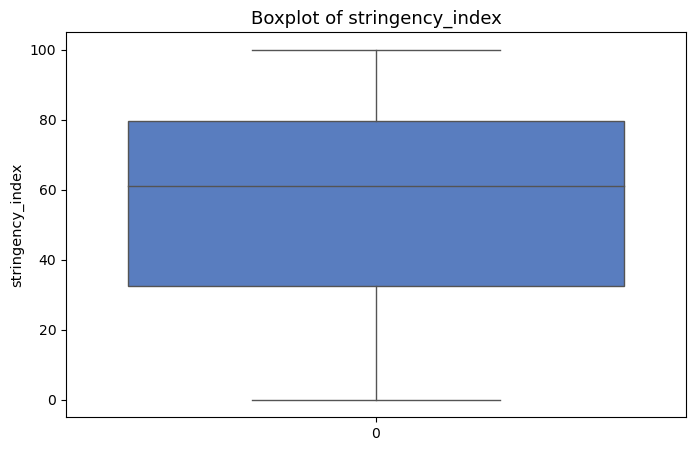

In [5]:
# Box plot for 'stringency_index'
plt.figure(figsize=(8, 5))
bp = sns.boxplot(mitigation_data['stringency_index'], 
                 palette="muted",
                 linewidth=1,
                 fliersize=5)
bp.set_ylabel("stringency_index", fontsize=10.5)
plt.title("Boxplot of stringency_index", fontsize=13)
plt.show()

In [6]:
# IQR method to detect outliers in mitigation_data
outliers_mitigation = pd.DataFrame()  

# Loop through numerical columns to identify outliers
for col in mitigation_data.select_dtypes(include=[np.number]).columns:
    Q1 = mitigation_data[col].quantile(0.25)
    Q3 = mitigation_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_mitigation[col] = (mitigation_data[col] < lower_bound) | (mitigation_data[col] > upper_bound)
    
# Identify rows with any outliers
outlier_rows = mitigation_data[outliers_mitigation.any(axis=1)]
print(outlier_rows)

Empty DataFrame
Columns: [country, code, day, stringency_index, restrictions_internal_movements, international_travel_controls, restriction_gatherings, school_closures, stay_home_requirements, workplace_closures]
Index: []


In [7]:
# ------
# EDA for covid_data

# Statistical Summary for covid_data
print("\033[1m" + "Statistical Summary for covid_data:" + "\033[0m")
print()
print(covid_data.describe())

Statistical Summary for covid_data:

       total_cases  new_cases  total_deaths  new_deaths  \
count     35145.00   35145.00      35145.00    35145.00   
mean      43102.20     719.02       2135.83       26.46   
std      259950.70    4267.15      10847.31      149.54   
min           0.00       0.00          0.00        0.00   
25%          11.00       0.00          0.00        0.00   
50%         838.00       5.00         12.00        0.00   
75%        9511.00     129.00        235.00        2.00   
max     6015379.00   78761.00     188798.00     5841.00   

       total_cases_per_million  new_cases_per_million  \
count                 35145.00               35145.00   
mean                   1173.13                  17.41   
std                    3190.71                  57.53   
min                       0.00                   0.00   
25%                       0.83                   0.00   
50%                      86.22                   0.44   
75%                     798.77  

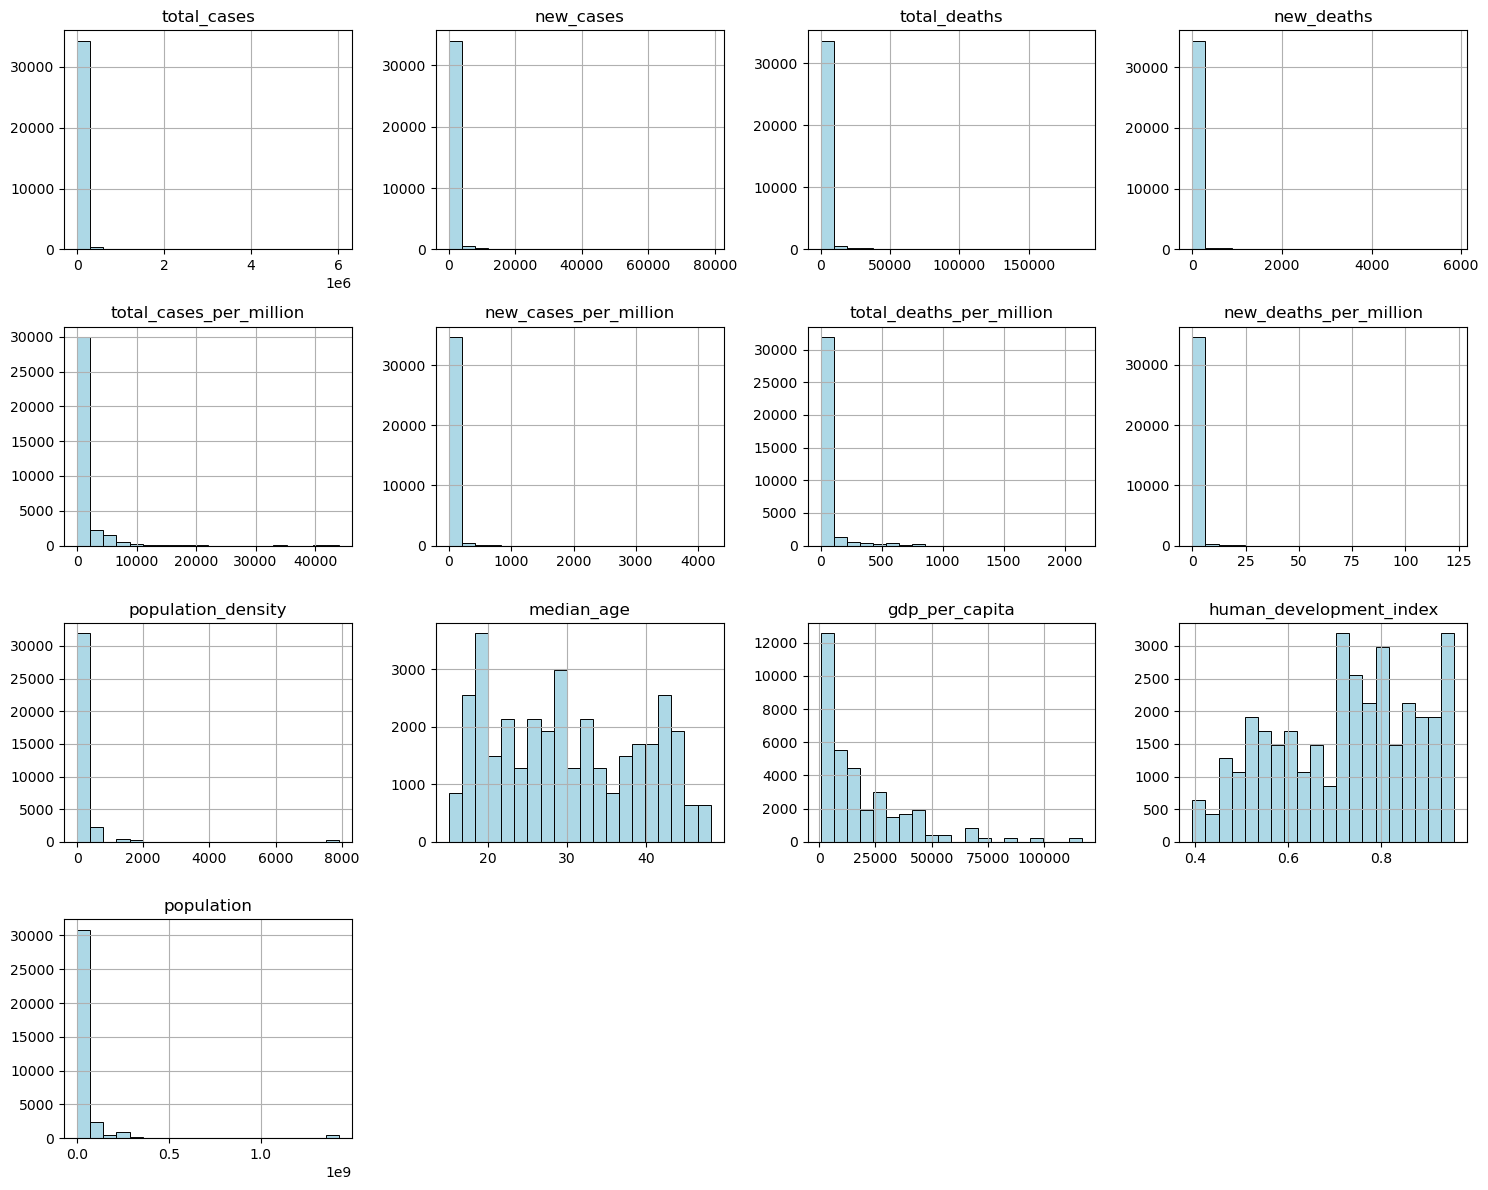

In [8]:
# Plot histograms for numerical columns in covid_data
covid_data.hist(figsize=(15, 12), 
                     bins=20, 
                     linewidth=0.7, 
                     color='lightblue', 
                     edgecolor='black')
plt.tight_layout()
plt.show()

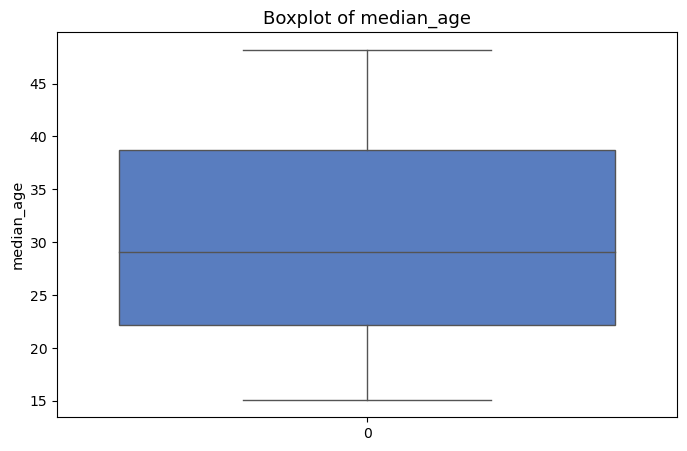

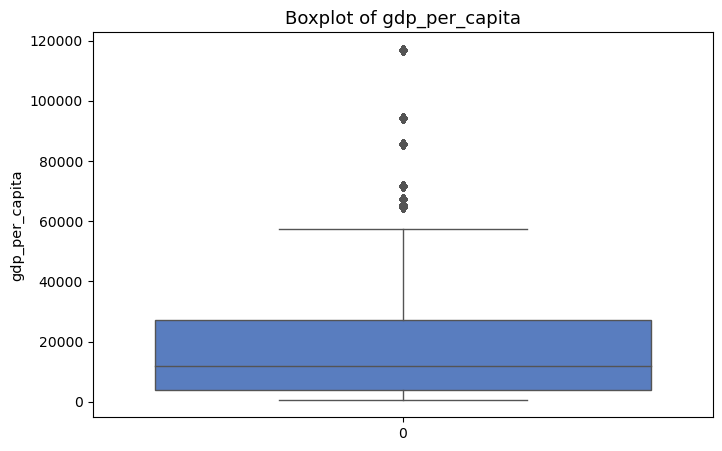

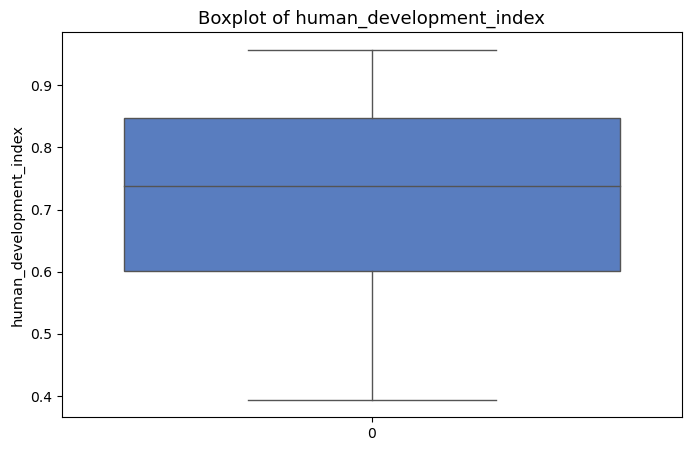

In [9]:
# Visualization - Box plot of selected columns in covid_data for potential outliers

# Box plots to visually inspect potential outliers median_age, gdp_per_capita, and human_development_index
columns_to_plot = ['median_age', 'gdp_per_capita', 'human_development_index']
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    bp = sns.boxplot(covid_data[column], 
                     palette="muted",
                     linewidth=1,
                     fliersize=5)   
    bp.set_ylabel(f"{column}", fontsize=10.5)
    plt.title(f"Boxplot of {column}", fontsize=13)
    plt.show()

In [10]:
# IQR method to detect outliers in covid_data
outliers_covid = pd.DataFrame() 

# Loop through numerical columns to identify outliers
for col in covid_data.select_dtypes(include=[np.number]).columns:  
    Q1 = covid_data[col].quantile(0.25)
    Q3 = covid_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_covid[col] = (covid_data[col] < lower_bound) | (covid_data[col] > upper_bound)

# Get outlier count for each column
try:
    outlier_count = outliers_covid.apply(pd.Series.value_counts).loc[True]
except KeyError:
    outlier_count = pd.Series([], name=True)

print("\033[1m" + "Outlier count per column in covid_data:" + "\033[0m")
print()
print(outlier_count.fillna(0).sort_values(ascending=False).astype(int))

Outlier count per column in covid_data:

new_deaths                  6485
new_deaths_per_million      6141
total_cases                 6139
new_cases                   6094
total_deaths                6073
new_cases_per_million       5770
total_deaths_per_million    5558
total_cases_per_million     5507
population_density          4047
population                  4047
gdp_per_capita              1704
median_age                     0
human_development_index        0
Name: True, dtype: int32


In [11]:
# Convert 'day' column to datetime format in covid_data
covid_data['day'] = pd.to_datetime(covid_data['day'])

# Aggregated Analysis for covid_data grouped by continent per week
aggregated_covid_data = covid_data.groupby(['continent', pd.Grouper(key='day', freq='W')]).mean(numeric_only=True)
# Change 'day' index name to 'week'
aggregated_covid_data.index.rename(names='week', level='day', inplace=True)
print("\033[1m" + "Aggregated covid_data grouped by continent:" + "\033[0m")
print()
print(aggregated_covid_data)

# Now, let's recompute the outlier information for the aggregated data
outliers_aggregated = pd.DataFrame()

for col in aggregated_covid_data.select_dtypes(include=[np.number]).columns:  
    Q1 = aggregated_covid_data[col].quantile(0.25)
    Q3 = aggregated_covid_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_aggregated[col] = (aggregated_covid_data[col] < lower_bound) | (aggregated_covid_data[col] > upper_bound)

# Display weeks in aggregated_covid_data that contain any outlier values
outlier_rows_aggregated = aggregated_covid_data[outliers_aggregated.any(axis=1)]
print()
print()
print("\033[1m" + "Outlier rows in aggregated covid_data:" + "\033[0m")
print()
print(outlier_rows_aggregated)

Aggregated covid_data grouped by continent:

                          total_cases  new_cases  total_deaths  new_deaths  \
continent     week                                                           
Africa        2020-02-02         0.00       0.00          0.00        0.00   
              2020-02-09         0.00       0.00          0.00        0.00   
              2020-02-16         0.00       0.00          0.00        0.00   
              2020-02-23         0.02       0.00          0.00        0.00   
              2020-03-01         0.04       0.01          0.00        0.00   
...                               ...        ...           ...         ...   
South America 2020-08-09    369097.50    6091.39      16381.44      199.04   
              2020-08-16    412544.21    6341.86      17746.74      194.31   
              2020-08-23    455703.45    5758.96      19090.27      190.19   
              2020-08-30    496726.35    5935.43      20421.90      183.64   
              2020-

In [12]:
# ------
# Convert 'day' column to datetime format in mitigation_data
mitigation_data['day'] = pd.to_datetime(mitigation_data['day'])

# Both mitigation_data and covid_data contain the same countries
# Create a new DataFrame with unique country-continent pairs from covid_data
unique_country_continent = covid_data[['country', 'continent']].drop_duplicates()

# Merge this information into mitigation_data so it has a column continent
mitigation_data = pd.merge(mitigation_data, unique_country_continent, on='country', how='left')

# Aggregated Analysis for mitigation_data grouped by countinent per week
aggregated_mitigation_data = mitigation_data.groupby(['continent', pd.Grouper(key='day', freq='W')]).mean(numeric_only=True)
# Change 'day' index name to 'week'
aggregated_mitigation_data.index.rename(names='week', level='day', inplace=True)
print("\033[1m" + "Aggregated mitigation_data grouped by continent:" + "\033[0m")
print()
print(aggregated_mitigation_data)


Aggregated mitigation_data grouped by continent:

                          stringency_index  restrictions_internal_movements  \
continent     week                                                            
Africa        2020-02-02              2.60                             0.00   
              2020-02-09              3.04                             0.00   
              2020-02-16              3.91                             0.00   
              2020-02-23              4.27                             0.00   
              2020-03-01              5.00                             0.00   
...                                    ...                              ...   
South America 2020-08-09             78.17                             1.83   
              2020-08-16             78.42                             1.83   
              2020-08-23             77.67                             1.83   
              2020-08-30             78.22                             1.83   
  

In [13]:
# Merge the datasets to combine relevant information for further analysis
merged_df = pd.merge(aggregated_mitigation_data, aggregated_covid_data, on=['continent', 'week'])
print("\033[1m" + "Merged dataset of mitigation_data and covid_data:" + "\033[0m")
print()
print(merged_df)

Merged dataset of mitigation_data and covid_data:

                          stringency_index  restrictions_internal_movements  \
continent     week                                                            
Africa        2020-02-02              2.60                             0.00   
              2020-02-09              3.04                             0.00   
              2020-02-16              3.91                             0.00   
              2020-02-23              4.27                             0.00   
              2020-03-01              5.00                             0.00   
...                                    ...                              ...   
South America 2020-08-09             78.17                             1.83   
              2020-08-16             78.42                             1.83   
              2020-08-23             77.67                             1.83   
              2020-08-30             78.22                             1.83   
 

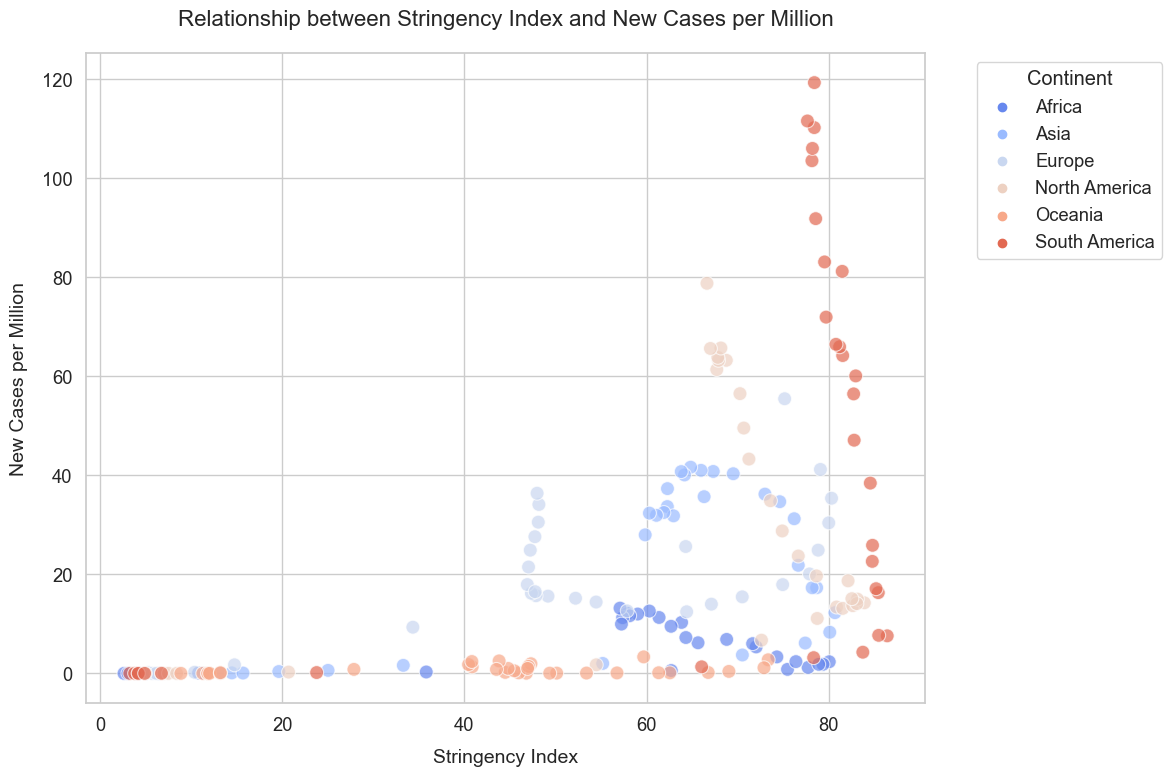

In [14]:
# Visualize the Relationship Between Stringency Index and Number of New Cases per Million People

# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Scatter plot visualization
sns.scatterplot(data=merged_df, 
                x='stringency_index', 
                y='new_cases_per_million', 
                hue='continent',
                palette="coolwarm", 
                s=100,
                alpha=0.7)

# Add axis labels and title
plt.xlabel('Stringency Index', fontsize=14, labelpad=10)
plt.ylabel('New Cases per Million', fontsize=14, labelpad=10)
plt.title('Relationship between Stringency Index and New Cases per Million', fontsize=16, pad=20)

# Add legend
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

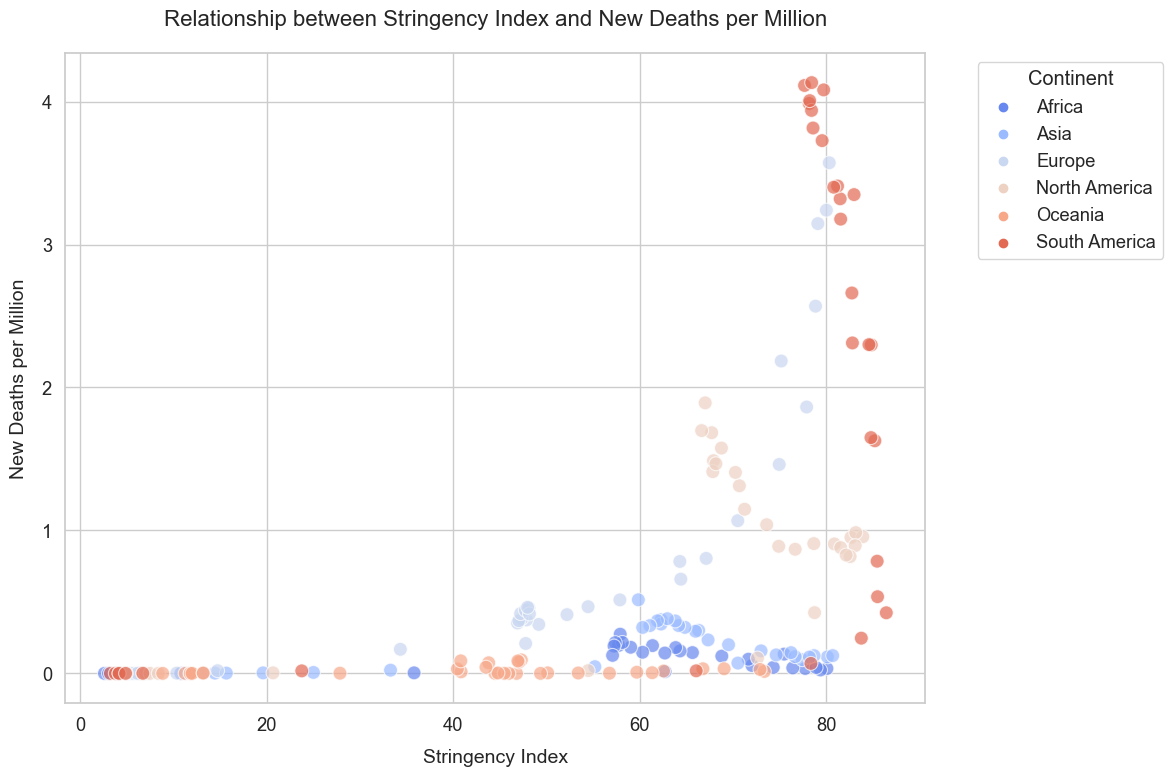

In [15]:
# Visualize the Relationship Between Stringency Index and Number of New Deaths per Million People

# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Scatter plot visualization
sns.scatterplot(data=merged_df, 
                x='stringency_index', 
                y='new_deaths_per_million', 
                hue='continent',
                palette="coolwarm", 
                s=100,
                alpha=0.7)

# Add axis labels and title
plt.xlabel('Stringency Index', fontsize=14, labelpad=10)
plt.ylabel('New Deaths per Million', fontsize=14, labelpad=10)
plt.title('Relationship between Stringency Index and New Deaths per Million', fontsize=16, pad=20)

# Add legend
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [16]:
# Spearman rank correlations

# Using Spearman rank correlations to find potential non-linear relationships between mitigation strategies and the growth rate of COVID cases and deaths
mitigation_measures = ['stringency_index', 'restrictions_internal_movements', 'international_travel_controls', 'restriction_gatherings', 'school_closures', 'stay_home_requirements', 'workplace_closures']
covid_trends = ['new_cases_per_million', 'new_deaths_per_million']

correlations = {}

for measure in mitigation_measures:
    for trend in covid_trends:
        correlation, p_value = spearmanr(merged_df[measure], merged_df[trend])
        correlations[f"{measure} vs. {trend}"] = correlation

correlation_df = pd.Series(correlations).reset_index()
correlation_df.columns = ['Pair', 'Correlation']
print("\033[1m" + "Spearman rank correlations:" + "\033[0m")
print(correlation_df.sort_values(by="Correlation", ascending=False))

Spearman rank correlations:
                                                 Pair  Correlation
7   restriction_gatherings vs. new_deaths_per_million         0.84
11  stay_home_requirements vs. new_deaths_per_million         0.77
6    restriction_gatherings vs. new_cases_per_million         0.77
3   restrictions_internal_movements vs. new_deaths...         0.77
1         stringency_index vs. new_deaths_per_million         0.76
13      workplace_closures vs. new_deaths_per_million         0.74
2   restrictions_internal_movements vs. new_cases_...         0.71
10   stay_home_requirements vs. new_cases_per_million         0.70
9          school_closures vs. new_deaths_per_million         0.70
0          stringency_index vs. new_cases_per_million         0.69
12       workplace_closures vs. new_cases_per_million         0.66
8           school_closures vs. new_cases_per_million         0.64
5   international_travel_controls vs. new_deaths_p...         0.39
4   international_travel_controls 

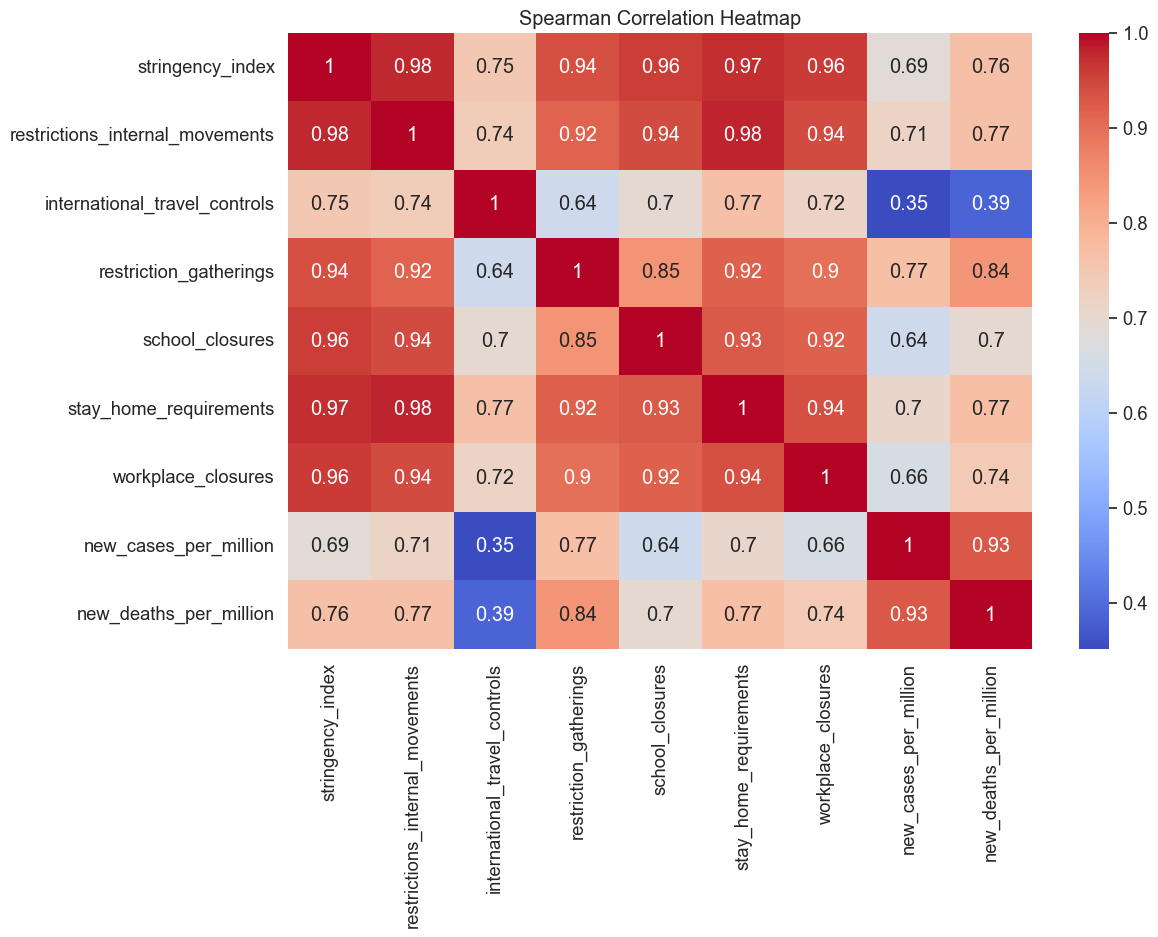

In [17]:
# Heatmap visualization of correlation values between the mitigation measures and COVID trends
correlation_matrix = merged_df[mitigation_measures + covid_trends].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()


In [18]:
# Aggregated Analysis by Continent

# Grouping data by continent to calculate the overall average of weekly averages 
# for governmental measures and COVID trends in the merged dataset
grouped_df = merged_df.groupby('continent').mean(numeric_only=True)[mitigation_measures + covid_trends] 
print("\033[1m" + "Aggregated Analysis by Continent:" + "\033[0m")
print()
print(grouped_df)

Aggregated Analysis by Continent:

               stringency_index  restrictions_internal_movements  \
continent                                                          
Africa                    52.25                             0.97   
Asia                      57.71                             1.09   
Europe                    49.50                             0.72   
North America             60.10                             1.28   
Oceania                   42.61                             0.61   
South America             64.94                             1.43   

               international_travel_controls  restriction_gatherings  \
continent                                                              
Africa                                  2.80                    2.19   
Asia                                    3.01                    2.27   
Europe                                  2.40                    2.38   
North America                           2.73                

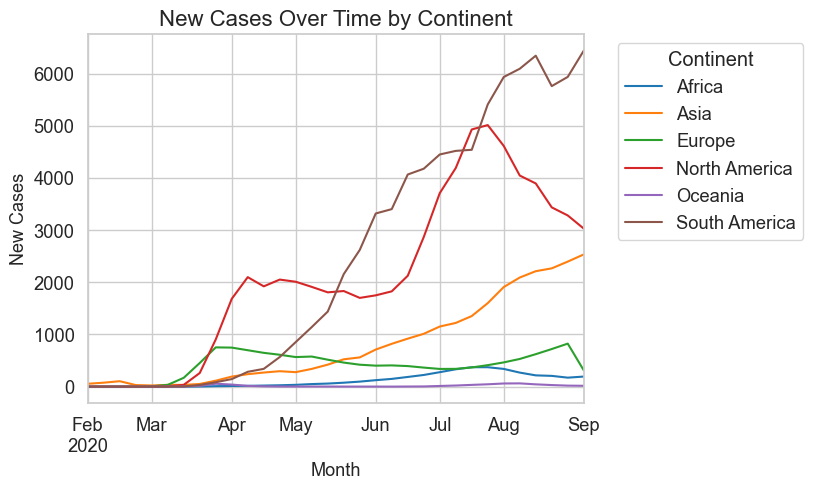

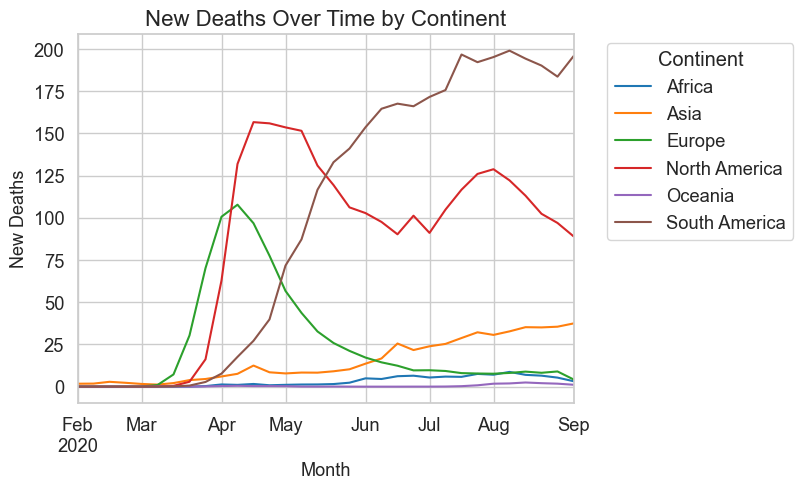

In [19]:
# Time Series Visualization

# Visualize the trend of new cases and new deaths over time, segregated by continent
grouped_time_series = merged_df[['new_cases', 'new_deaths']]

# Loop for plotting new cases for each continent
for continent in grouped_time_series.index.get_level_values(0).unique():
    grouped_time_series.loc[continent]['new_cases'].plot(label=continent, legend=True)
    
# Add axis labels and title
plt.title("New Cases Over Time by Continent", fontsize=16)
plt.xlabel("Month", fontsize=13)
plt.ylabel("New Cases", fontsize=13)

# Add legend
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1))
plt.show()

print()
print()

# Loop for plotting new deaths for each continent
for continent in grouped_time_series.index.get_level_values(0).unique():
    grouped_time_series.loc[continent]['new_deaths'].plot(label=continent, legend=True)
    
# Add axis labels and title
plt.title("New Deaths Over Time by Continent", fontsize=16)
plt.xlabel("Month", fontsize=13)
plt.ylabel("New Deaths", fontsize=13)

# Add legend
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1))
plt.show()